<a href="https://colab.research.google.com/github/HassanCoulibaly/MachineLearningProject/blob/side/LSTM_AND_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOADING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense
import matplotlib.pyplot as plt

LOADING DATASETS

In [ ]:
train_df = pd.read_csv('dataset/train_df.csv')
test_df = pd.read_csv('dataset/test_df.csv')

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(['negative', 'neutral', 'positive'])
y_train = tf.keras.utils.to_categorical(label_encoder.transform(train_df['sentiment']), num_classes=3)
y_test = tf.keras.utils.to_categorical(label_encoder.transform(test_df['sentiment']), num_classes=3)

In [ ]:
vocab_size = 10000
max_length = 40
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['tweet'])

In [ ]:
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['tweet']), maxlen=max_length, padding='post')
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df['tweet']), maxlen=max_length, padding='post')

GloVe Embedding

In [ ]:
embedding_dim = 50
embedding_index = {}
with open('dataset/glove.6B.50d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

MODEL

In [ ]:
model = Sequential([
    Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=False),
    Conv1D(32, kernel_size=3, activation='relu'),
    Conv1D(32, kernel_size=3, activation='relu'),
    Conv1D(32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,000 (1.91 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 500,000 (1.91 MB)

TRAINING

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
1668/1668 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.4865 - loss: 0.9722 - val_accuracy: 0.5502 - val_loss: 0.9407
Epoch 2/10
1668/1668 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.5907 - loss: 0.8577 - val_accuracy: 0.6032 - val_loss: 0.8687
Epoch 3/10
1668/1668 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.6126 - loss: 0.8199 - val_accuracy: 0.6036 - val_loss: 0.8677
Epoch 4/10
1668/1668 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.6317 - loss: 0.7934 - val_accuracy: 0.6096 - val_loss: 0.8501
Epoch 5/10
1668/1668 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.6369 - loss: 0.7790 - val_accuracy: 0.6100 - val_loss: 0.8510
Epoch 6/10
1668/1668 ━━━━━━━━━━━━━━━━━━━━ 84s 28ms/step - accuracy: 0.6494 - loss: 0.7633 - val_accuracy: 0.6067 - val_loss: 0.8608
Epoch 7/10
1668/1668 ━━━━━━━━━━━━━━━━━━━━ 79s 27ms/step - accuracy: 0.6567 - loss: 0.7505 - val_accuracy: 0.6104 - val_loss: 0.8586
Epoch 8/10
1668/1668 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.6639 -

PLOT

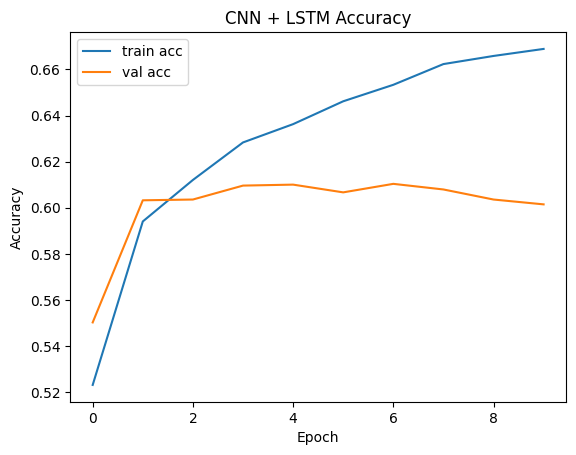

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('CNN + LSTM Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
